<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Income       400 non-null    float64
 2   Limit        400 non-null    int64  
 3   Rating       400 non-null    int64  
 4   Cards        400 non-null    int64  
 5   Age          400 non-null    int64  
 6   Education    400 non-null    int64  
 7   Gender-num   400 non-null    int64  
 8   Gender       400 non-null    object 
 9   Student-num  400 non-null    int64  
 10  Student      400 non-null    object 
 11  Married      400 non-null    object 
 12  Ethnicity    400 non-null    object 
 13  Balance      400 non-null    int64  
 14  Defaultee    400 non-null    int64  
 15  dcat         400 non-null    object 
dtypes: float64(1), int64(10), object(5)
memory usage: 50.1+ KB
Accuracy: 1.0000
Confusion Matrix:
[[96  0]
 [ 0 24]]
Classification Report

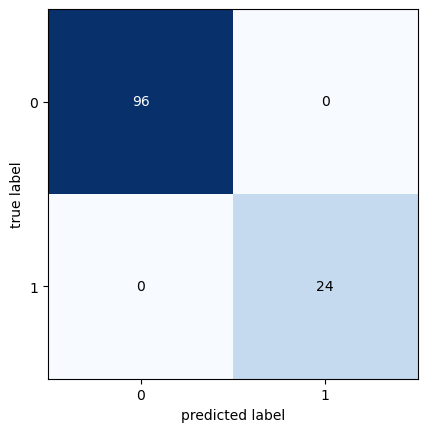

       Feature     F-Value       P-Value
0       Income   30.587183  1.947321e-07
1        Limit   90.378059  2.955557e-16
2       Rating   91.075672  2.421534e-16
3        Cards    0.133908  7.150689e-01
4          Age    0.002142  9.631614e-01
5    Education    1.482109  2.258739e-01
6   Gender-num    2.754467  9.963856e-02
7  Student-num    6.464834  1.229753e-02
8      Balance  169.903057  1.326267e-24


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


SVM1=pd.read_csv('Credit-Modified.csv')
SVM1.head()
SVM1.info()
SVM1.describe()
SVM1.isnull().sum()
SVM1.shape
SVM1.columns

SVM1['Gender']=SVM1['Gender'].map({'Male':0,'Female':1})
SVM1['Student']=SVM1['Student'].map({'Yes':0,'No':1})
SVM1['Married']=SVM1['Married'].map({'Yes':0,'No':1})
#SVM1['Defaultee']=SVM1['Defaultee'].replace(['No','yes'],[0,1])


X = SVM1.drop(['Unnamed: 0', 'Defaultee', 'Gender', 'Student', 'Married','Ethnicity','dcat'], axis=1)
X

y = SVM1['Defaultee']
y

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train

y_train

X_test

y_test

# Create and train the SVM model
from sklearn.svm import SVC
model3 = SVC(kernel='linear', C=1.0, random_state=1)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

#create confusion metrics to understand the classification
from sklearn import metrics
conf=metrics.confusion_matrix(y_test,y_pred)
conf

from mlxtend.plotting import plot_confusion_matrix
fig,ax=plot_confusion_matrix(conf_mat=conf)
plt.show()


from sklearn.feature_selection import f_classif

# Perform ANOVA test for feature significance
f_values, p_values = f_classif(X_test, y_pred)

# Create a table for feature significance
anova_results = pd.DataFrame({'Feature': X_test.columns, 'F-Value': f_values, 'P-Value': p_values})
print(anova_results)



